<a href="https://colab.research.google.com/github/arpithak2818/ML-Projects/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [ ]:
#loading the data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
print(x_test.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(50000, 1)


In [ ]:
x_train[3]

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]

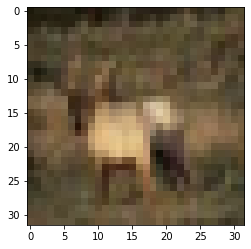

In [ ]:
#plotting the image
plt.imshow(x_train[3])
plt.show()

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#normalizing our dataset images from values of pixels between 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[3]

array([[[0.10980392, 0.09803922, 0.03921569],
        [0.14509804, 0.13333333, 0.0745098 ],
        [0.14901961, 0.1372549 , 0.07843137],
        ...,
        [0.29803922, 0.2627451 , 0.15294118],
        [0.31764706, 0.28235294, 0.16862745],
        [0.33333333, 0.29803922, 0.18431373]],

       [[0.12941176, 0.10980392, 0.05098039],
        [0.13333333, 0.11764706, 0.05490196],
        [0.1254902 , 0.10588235, 0.04705882],
        ...,
        [0.37254902, 0.32156863, 0.21568627],
        [0.37647059, 0.32156863, 0.21960784],
        [0.33333333, 0.28235294, 0.17647059]],

       [[0.15294118, 0.1254902 , 0.05882353],
        [0.15686275, 0.12941176, 0.06666667],
        [0.22352941, 0.19607843, 0.12941176],
        ...,
        [0.36470588, 0.29803922, 0.20392157],
        [0.41960784, 0.34901961, 0.25882353],
        [0.37254902, 0.30196078, 0.21176471]],

       ...,

       [[0.3254902 , 0.28627451, 0.20392157],
        [0.34117647, 0.30196078, 0.21960784],
        [0.32941176, 0

In [ ]:
#Encoding the labels using np_utils
y_train = np_utils.to_categorical(y_train)
y_test =np_utils.to_categorical(y_test)

In [ ]:
#Building our Convolution neural network
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(2,2),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10)

Epoch 1/10
391/391 [==============================] - 3s 6ms/step - loss: 1.0578 - accuracy: 0.6288
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.0245 - accuracy: 0.6421
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.9975 - accuracy: 0.6506
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.9773 - accuracy: 0.6577
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 0.9566 - accuracy: 0.6651
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 0.9515 - accuracy: 0.6674
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 0.9269 - accuracy: 0.6768
Epoch 8/10
391/391 [==============================] - 2s 5ms/step - loss: 0.9139 - accuracy: 0.6811
Epoch 9/10
391/391 [==============================] - 2s 5ms/step - loss: 0.9030 - accuracy: 0.6855
Epoch 10/10
391/391 [==============================] - 2s 5ms/step - loss: 0.8979 - accuracy: 0.6879

In [ ]:
#evaluating our test data
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9695 - accuracy: 0.6629


[0.9695188403129578, 0.6628999710083008]

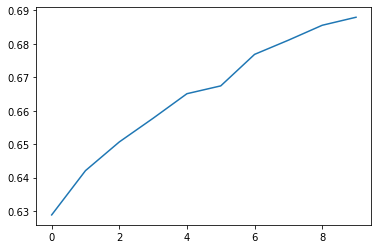

In [ ]:
#plotting our accuracy
plt.plot(history.history['accuracy'])

In [ ]:
#predicting the model
prediction=model.predict(x_test)

In [ ]:
#rounding our output to the exact number
print(np.argmax(np.round(prediction[450])))

6
